In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train - mean_image)/(std+1e-7)
x_test = (x_test - mean_image)/(std+1e-7)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
#This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of
#the input vector and number of columns equal to the number of classes.
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 10)
y_test: (10000, 10)


In [3]:
model = Sequential()
# convolution layer & maxpooling layer with 32 nodes
model.add(Conv2D(32, (3, 3), activation = "relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# convolution layer & maxpooling layer with 64 nodes
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten serves as a connection between the convolution and dense layers. 
model.add(Flatten()) 
# output layer
model.add(Dense(64, activation = "relu"))
model.add(Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_test,y_test),)

Epoch 1/50
1000/1000 [==============================] - 25s 24ms/step - loss: 1.6816 - accuracy: 0.3882 - val_loss: 1.1711 - val_accuracy: 0.5866
Epoch 2/50
1000/1000 [==============================] - 27s 27ms/step - loss: 1.0965 - accuracy: 0.6170 - val_loss: 1.0322 - val_accuracy: 0.6424
Epoch 3/50
1000/1000 [==============================] - 26s 26ms/step - loss: 0.9279 - accuracy: 0.6790 - val_loss: 0.9104 - val_accuracy: 0.6870
Epoch 4/50
1000/1000 [==============================] - 29s 29ms/step - loss: 0.8224 - accuracy: 0.7159 - val_loss: 0.8632 - val_accuracy: 0.7028
Epoch 5/50
1000/1000 [==============================] - 30s 30ms/step - loss: 0.7423 - accuracy: 0.7438 - val_loss: 0.8639 - val_accuracy: 0.7056
Epoch 6/50
1000/1000 [==============================] - 29s 29ms/step - loss: 0.6754 - accuracy: 0.7668 - val_loss: 0.8107 - val_accuracy: 0.7256
Epoch 7/50
1000/1000 [==============================] - 29s 29ms/step - loss: 0.6228 - accuracy: 0.7844 - val_loss: 0.8091 -

In [5]:
loss_history, test_loss_history, train_acc_history,val_acc_history = (history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy'])

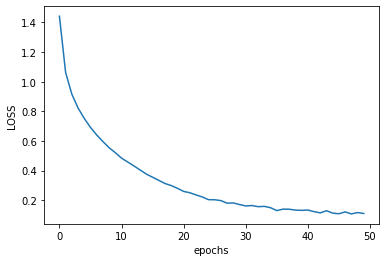

In [6]:
fig, axes = plt.subplots()
axes.plot(loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('LOSS.png',transparent=True)

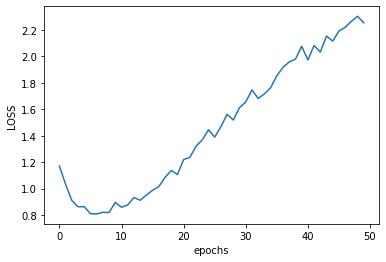

In [7]:
fig, axes = plt.subplots()
axes.plot(test_loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('testing_loss.png',transparent=True)

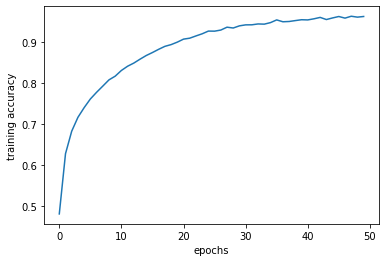

In [8]:
fig, axes = plt.subplots() 
axes.plot(train_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("training accuracy")
plt.show()
fig.savefig('training accuracy.png',transparent=True)

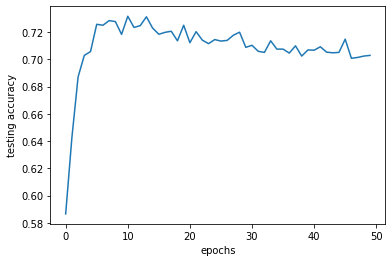

In [9]:
fig, axes = plt.subplots() 
axes.plot(val_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("testing accuracy")
plt.show()
fig.savefig('testing accuracy.png',transparent=True)